In [1]:
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph
%matplotlib notebook

<IPython.core.display.Javascript object>


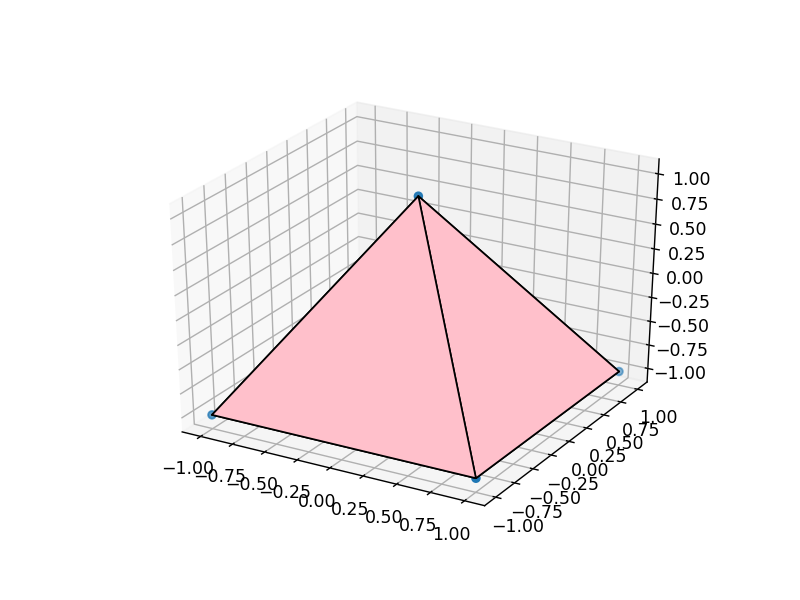

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# membuat titik titik bangun limas
limas = np.array([[-1, -1, -1],
                  [1, -1, -1],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [0, 0, 1]])

# Memploting titik limas saya menggunakan scatter3D
# parameternya membuatuhkan koordinat x, y, z 
# dimana x, y, z tersebut didapat dari kolom kolom matriks limas 
ax.scatter3D(limas[:, 0], limas[:, 1], limas[:, 2])

# untuk membuat sisinya dengan mengkombinasikan titik titik dari limas tersebut
# jadi ada 4 sisi yang mempunyai 3 titik dan 1 sisi atau alas mempunyai 4 titik
verts = [ [limas[0],limas[1],limas[4]],
          [limas[0],limas[3],limas[4]],
          [limas[2],limas[1],limas[4]],
          [limas[2],limas[3],limas[4]], 
          [limas[0],limas[1],limas[2],limas[3]]]

# Memploting sisi limas menggunakan Poly3DCollection
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black'))

plt.show()

In [ ]:
'''
Axis/angle 
Rotasi dapat direpresentasikan dengan sumbu rotasi n_topi dan sudut θ
Untuk menggunakan metode ini sudah pasti membutuhkan n_topi dan θ, dimana 
n_topi merupakan vektor-3 acak yang terdiri dari nx, ny dan nz. 
# jelasin kenapa magnitude n_topi harus bernilai || n̂ || = 1
# jelasin theta besarannya apa 

formula rodriguez
R(n̂, theta) = I + sin(theta)[n^]x + (1-cos(theta))([n^]x)^2

# I = matriks identitas 3x3

# [n^]x, matriks 3x3 yang dibentuk oleh n̂
# [n^]x = [[  0, -nz,  ny],
           [ nz,   0, -nx],
           [-ny,  nx,   0]]

# ([n^]x)^2, matriks [n^]x yang dikali matriks dengan dirinya sendiri
'''

In [13]:
n_topi = np.array ([1,0,0])
# cek apakah magnitudenya = 1
# jelasin linalg norm apaan
mg = np.linalg.norm(n_topi)
# untuk lebih mudah supaya magnitudenya = 1 
# maka komponen n_topi kita kali dengan 1/(magnitude keluaran)
n_topi = (1/mg)*n_topi
print(np.linalg.norm(n_topi))

1.0


In [14]:
def rodriguez_formula (mat, n_topi, theta):
    # kita pisah komponen yang berada di n_topi, untuk membentuk [n^]x
    nx, ny, nz = n_topi
    ntopi_x = np.array([[ 0 , -nz,  ny],
                        [ nz,   0, -nx],
                        [-ny,  nx,   0]])
    # Matriks identitas 3x3
    I = np.eye(3)
    
    sin = np.sin(theta)
    cos = np.cos(theta)
    
    # Membuat matriks rodriquez dengan mengikuti rumusnya
    # R(n̂, theta) = I + sin(theta)[n^]x + (1-cos(theta))([n^]x)^2
    rodri_mat = I + (sin*ntopi_x) + ((1-cos)*(ntopi_x@ntopi_x))
    
    baris, kolom = mat.shape
    
    hasil = np.array([])
    
    for row in mat:
        output_row = rodri_mat@row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(baris, kolom))

<IPython.core.display.Javascript object>


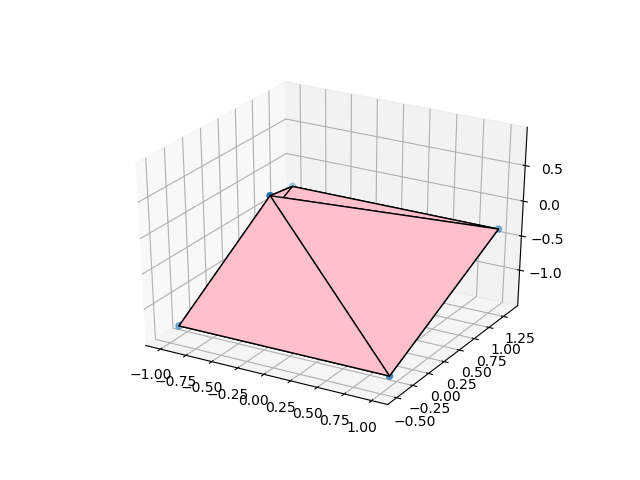

In [16]:
# Membuat tranformasi dengan merotasi bidang limas tersebut dengan
# sumbu rotasi berada pada koordinat (1,0,0) dan sudut sebesar 30 derajat
limrodri = rodriguez_formula(limas, n_topi, np.pi/6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(limrodri[:, 0], limrodri[:, 1], limrodri[:, 2])
verts = [[limrodri[0],limrodri[1],limrodri[4]],
         [limrodri[0],limrodri[3],limrodri[4]],
         [limrodri[2],limrodri[1],limrodri[4]],
         [limrodri[2],limrodri[3],limrodri[4]],
         [limrodri[0],limrodri[1],limrodri[2],limrodri[3]]]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black'))

plt.show()

In [ ]:
# Unit quaternions
# jelasin turuunan rumusnya 
# rumusnya berasal dari rodri formula

In [17]:
theta = np.pi/6
v = (np.sin(theta/2)) * n_topi
w = np.cos(theta/2)

In [18]:
def quaternions(mat, v, w):
    x, y, z = v
    v_x = np.array([[ 0, -z,  y],
                    [ z,  0, -x],
                    [-y,  x,  0]])
    I = np.eye(3)
    quaternions_mat = I + (2*w*v_x) + (2*(v_x@v_x))
    
    rowInput,colInput = mat.shape
    
    hasil = np.array([])
    for row in mat:
        output_row = quaternions_mat@row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(rowInput,colInput))

<IPython.core.display.Javascript object>


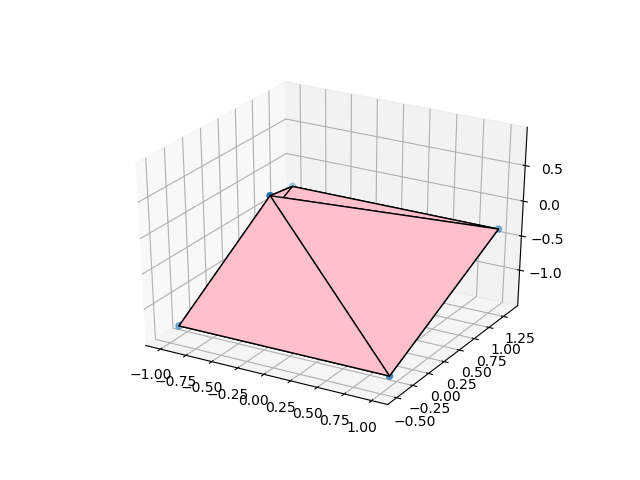

In [19]:
limrot = quaternions(limas,v,w)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(limrot[:, 0], limrot[:, 1], limrot[:, 2])
# generate list of sides' polygons of our pyramid
verts = [[limrot[0],limrot[1],limrot[4]],
         [limrot[0],limrot[3],limrot[4]],
         [limrot[2],limrot[1],limrot[4]],
         [limrot[2],limrot[3],limrot[4]],
         [limrot[0],limrot[1],limrot[2],limrot[3]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black', alpha=.25))

plt.show()